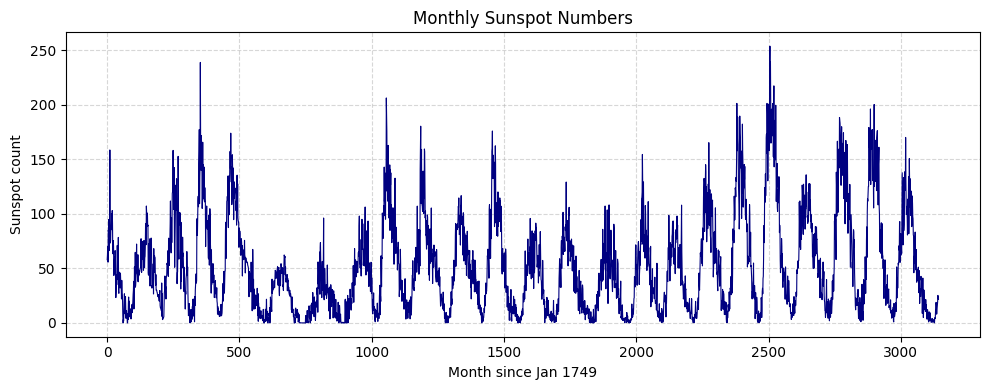

In [1]:

import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt("sunspots.txt")
months = data[:, 0]
sunspots = data[:, 1]


plt.figure(figsize=(10, 4))
plt.plot(months, sunspots, color="navy", linewidth=0.8)
plt.xlabel("Month since Jan 1749")
plt.ylabel("Sunspot count")
plt.title("Monthly Sunspot Numbers")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()




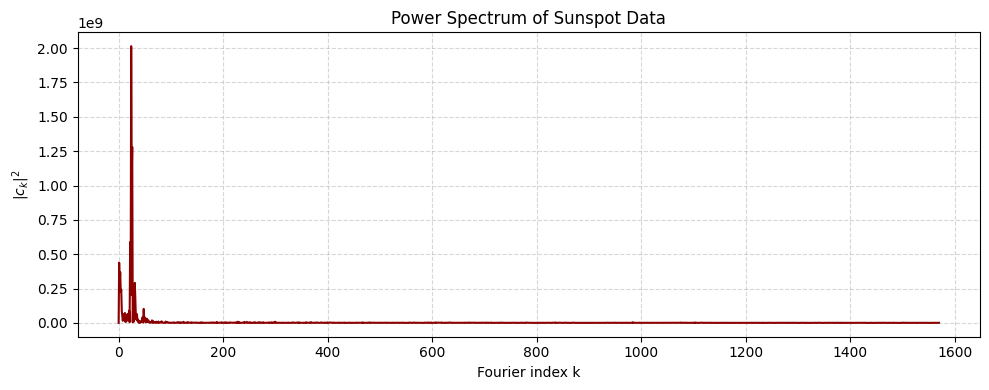

In [5]:

import numpy as np
import matplotlib.pyplot as plt


data = np.loadtxt("sunspots.txt")
months = data[:, 0]
sunspots = data[:, 1]

# Remove mean to avoid large DC component
signal = sunspots - np.mean(sunspots)


c_k = np.fft.fft(signal)
power = np.abs(c_k)**2

# Frequencies
N = len(signal)
k = np.arange(N)

# Plot power spectrum (first half is unique)
plt.figure(figsize=(10, 4))
plt.plot(k[:N//2], power[:N//2], color="darkred")
plt.xlabel("Fourier index k")
plt.ylabel(r"$|c_k|^2$")
plt.title("Power Spectrum of Sunspot Data")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [4]:

import numpy as np


data = np.loadtxt("sunspots.txt")
months = data[:, 0]
sunspots = data[:, 1]

signal = sunspots - np.mean(sunspots)
c_k = np.fft.fft(signal)
power = np.abs(c_k)**2
N = len(signal)

# Ignore k=0 (DC component)
power[0] = 0

# Find index of maximum peak in first half
k_peak = np.argmax(power[:N//2])

# Convert Fourier index to period in months
period_months = N / k_peak

print(f"Peak at k = {k_peak}")
print(f"Corresponding period ≈ {period_months:.1f} months (~{period_months/12:.1f} years)")


Peak at k = 24
Corresponding period ≈ 131.0 months (~10.9 years)
